In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyreadstat
import json

sns.set_theme()

In [21]:
df, meta = pyreadstat.read_sav("../data/dataset.sav", encoding="LATIN1", formats_as_category=True)
df

,REG,PRO,MIL,MEN.PRO,NOR.MEN,LIEN.CM,NATIO,SEXE,AGE1,AGE5,...,LANG.LOC2,TY.ACT,PROF.SGG,PROF.GG,STAT.PROF,ACT.SECTION,ACT.SECTEUR,TRAV.LIEU,TRAV.TRANS,PDS
0,1.0,51.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,45.0,...,NaN,2.0,33.0,3.0,5.0,9.0,7.0,NaN,NaN,9.999995
1,1.0,51.0,1.0,1.0,2.0,4.0,1.0,2.0,NaN,60.0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
2,1.0,51.0,2.0,2.0,1.0,0.0,1.0,1.0,17.0,15.0,...,NaN,0.0,62.0,6.0,5.0,3.0,2.0,1.0,0.0,9.999995
3,1.0,51.0,2.0,2.0,2.0,9.0,1.0,1.0,20.0,20.0,...,NaN,0.0,92.0,9.0,3.0,3.0,2.0,2.0,0.0,9.999995
4,1.0,51.0,2.0,2.0,3.0,9.0,1.0,1.0,22.0,20.0,...,NaN,0.0,62.0,6.0,5.0,3.0,2.0,NaN,NaN,9.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341421,NaN,NaN,1.0,561.0,10.0,6.0,1.0,2.0,21.0,20.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
3341422,NaN,NaN,1.0,561.0,11.0,3.0,1.0,2.0,0.0,0.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
3341423,NaN,NaN,1.0,561.0,12.0,2.0,1.0,1.0,NaN,30.0,...,NaN,0.0,73.0,7.0,5.0,1.0,1.0,2.0,4.0,9.999995
3341424,NaN,NaN,1.0,561.0,13.0,6.0,1.0,2.0,22.0,20.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995


In [33]:
# Fix encoding
meta.variable_value_labels = {k: {v.encode("LATIN1").decode("UTF-8"): k for k, v in meta.value_labels[k].items()} for k in meta.value_labels.keys()}
meta.value_labels = {k: {v.encode("LATIN1").decode("UTF-8"): k for k, v in meta.value_labels[k].items()} for k in meta.value_labels.keys()}
#meta.column_labels = {k: v.encode("LATIN1").decode("UTF-8") for k, v in meta.column_labels.items()}
#meta.column_names_to_labels = {k: v.encode("LATIN1").decode("UTF-8") for k, v in meta.column_names_to_labels.items()}

In [22]:
_df = df.copy()
#_df = df.dropna(subset=["REG", "PRO", "LANG1"]) # filter out missing values for region, province, or language

In [24]:
_df = _df.loc[_df["NATIO"] == 1] # filter out non-Moroccans
_df = _df.loc[_df["AGE1"] >= 18] # filter out minors
_df = _df.loc[_df["HANDI.VIS"] <= 2] # filter out visual disability
_df = _df.loc[_df["HANDI.AUD"] <= 2] # filter out auditory disability
_df = _df.loc[_df["HANDI.MEM"] <= 2] # filter out memory disability
_df = _df.loc[_df["HANDI.COM"] <= 2] # filter out communication disability
_df = _df.loc[_df["LIR.ECR"] <= 2] # filter out unknown literacy

In [25]:
_df

,REG,PRO,MIL,MEN.PRO,NOR.MEN,LIEN.CM,NATIO,SEXE,AGE1,AGE5,...,LANG.LOC2,TY.ACT,PROF.SGG,PROF.GG,STAT.PROF,ACT.SECTION,ACT.SECTEUR,TRAV.LIEU,TRAV.TRANS,PDS
3,1.0,51.0,2.0,2.0,2.0,9.0,1.0,1.0,20.0,20.0,...,NaN,0.0,92.0,9.0,3.0,3.0,2.0,2.0,0.0,9.999995
4,1.0,51.0,2.0,2.0,3.0,9.0,1.0,1.0,22.0,20.0,...,NaN,0.0,62.0,6.0,5.0,3.0,2.0,NaN,NaN,9.999995
5,1.0,51.0,2.0,2.0,4.0,9.0,1.0,1.0,20.0,20.0,...,NaN,0.0,62.0,6.0,5.0,3.0,2.0,NaN,NaN,9.999995
11,1.0,51.0,2.0,3.0,5.0,2.0,1.0,1.0,24.0,20.0,...,NaN,0.0,92.0,9.0,3.0,7.0,5.0,3.0,8.0,9.999995
16,1.0,51.0,2.0,4.0,5.0,2.0,1.0,1.0,21.0,20.0,...,1.0,0.0,94.0,9.0,2.0,6.0,4.0,2.0,8.0,9.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341403,NaN,NaN,1.0,533.0,4.0,2.0,1.0,1.0,19.0,15.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
3341409,NaN,NaN,1.0,533.0,10.0,2.0,1.0,1.0,24.0,20.0,...,NaN,0.0,32.0,3.0,5.0,7.0,5.0,2.0,0.0,9.999995
3341414,NaN,NaN,1.0,561.0,3.0,2.0,1.0,1.0,24.0,20.0,...,NaN,0.0,63.0,6.0,5.0,7.0,5.0,2.0,0.0,9.999995
3341421,NaN,NaN,1.0,561.0,10.0,6.0,1.0,2.0,21.0,20.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995


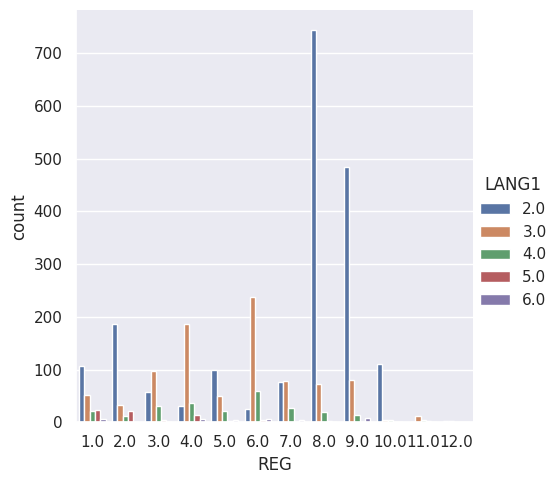

In [10]:
sns.catplot(data=_df.loc[_df["LANG1"] > 1], x="REG", hue="LANG1", kind="count")
plt.show()

In [19]:
df_out = pyreadstat.set_value_labels(_df, meta, formats_as_category=True)
df_out

,REG,PRO,MIL,MEN.PRO,NOR.MEN,LIEN.CM,NATIO,SEXE,AGE1,AGE5,...,LANG.LOC2,TY.ACT,PROF.SGG,PROF.GG,STAT.PROF,ACT.SECTION,ACT.SECTEUR,TRAV.LIEU,TRAV.TRANS,PDS
0,Tanger-TÃ©touan-Al HoceÃ¯ma,Al HoceÃ¯ma,Urbain,1.0,1.0,Head of household,Moroccan,Male,NaN,45-49 ans,...,NaN,ChÃ´meur ayant dÃ©jÃ travaillÃ©,"33 - EmployÃ©s de l'hÃ´tellerie, de la restaur...",3 - EmployÃ©s,SalariÃ© du secteur privÃ©,I - HÃ©bergement et restauration,Autres services marchands,NaN,NaN,9.999995
1,Tanger-TÃ©touan-Al HoceÃ¯ma,Al HoceÃ¯ma,Urbain,1.0,2.0,Parent,Moroccan,Female,NaN,60-64 ans,...,Tarifit,Femme au foyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
2,Tanger-TÃ©touan-Al HoceÃ¯ma,Al HoceÃ¯ma,Rural,2.0,1.0,Head of household,Moroccan,Male,17 ans,15-19 ans,...,NaN,Actif occupÃ©,62 - Artisans et ouvriers qualifiÃ©s de la pro...,6 - Artisans et ouvriers qualifiÃ©s des mÃ©tie...,SalariÃ© du secteur privÃ©,C - Industries manufacturiÃ¨res,Industries extractives et manufacturiÃ¨res,Quartier/Douar de rÃ©sidence,Ã pied,9.999995
3,Tanger-TÃ©touan-Al HoceÃ¯ma,Al HoceÃ¯ma,Rural,2.0,2.0,Unrelated,Moroccan,Male,20 ans,20-24 ans,...,NaN,Actif occupÃ©,92 - ManÅuvres des mÃ©tiers artisanaux,"9 - ManÅuvres non agricoles, manutentionnaire...",Aide familial / Apprenti,C - Industries manufacturiÃ¨res,Industries extractives et manufacturiÃ¨res,Autre quartier/douar dans la commune de rÃ©sid...,Ã pied,9.999995
4,Tanger-TÃ©touan-Al HoceÃ¯ma,Al HoceÃ¯ma,Rural,2.0,3.0,Unrelated,Moroccan,Male,22 ans,20-24 ans,...,NaN,Actif occupÃ©,62 - Artisans et ouvriers qualifiÃ©s de la pro...,6 - Artisans et ouvriers qualifiÃ©s des mÃ©tie...,SalariÃ© du secteur privÃ©,C - Industries manufacturiÃ¨res,Industries extractives et manufacturiÃ¨res,NaN,NaN,9.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341421,NaN,NaN,Urbain,561.0,10.0,In-law,Moroccan,Female,21 ans,20-24 ans,...,NaN,Femme au foyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
3341422,NaN,NaN,Urbain,561.0,11.0,Grandchild,Moroccan,Female,Moins d'1 an,0-4 ans,...,NaN,Autre inactif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995
3341423,NaN,NaN,Urbain,561.0,12.0,Child,Moroccan,Male,NaN,30-34 ans,...,NaN,Actif occupÃ©,73 - Ouvriers et ManÅuvres de la pÃªche de po...,7 - Ouvriers et manÅuvres agricoles et de la ...,SalariÃ© du secteur privÃ©,"A - Agriculture, sylviculture et pÃªche","Agriculture, sylviculture et pÃªche",Autre quartier/douar dans la commune de rÃ©sid...,Taxi,9.999995
3341424,NaN,NaN,Urbain,561.0,13.0,In-law,Moroccan,Female,22 ans,20-24 ans,...,NaN,Femme au foyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.999995


In [20]:
df_out.to_csv("../data/dataset.csv", index=False)

In [23]:
_df.to_csv("../data/dataset.csv", index=False)

In [68]:
tmp = {meta.variable_to_label[k]: k for k in meta.variable_to_label.keys()}
labels = {tmp.get(k, k): v for k, v in meta.value_labels.items()}
labels = {k: {int(v): k for k, v in v.items()} for k, v in labels.items()}

with open("../data/metadata.json", "w") as f:
    json.dump(labels, f, indent=4, ensure_ascii=False)

In [36]:
df_out = df.copy()

if meta.value_labels and meta.variable_to_label:
    for var_name, label_name in meta.variable_to_label.items():
        labels = meta.value_labels.get(label_name)
        if labels:
            if var_name in df_out.columns:
                df_out[var_name] = df_out[var_name].apply(lambda x: labels.get(x, x))
                
df_out

: 

: 

In [54]:
meta.variable_to_label

{'REG': 'labels0',
 'PRO': 'labels1',
 'MIL': 'labels2',
 'LIEN.CM': 'labels3',
 'NATIO': 'labels4',
 'SEXE': 'labels5',
 'AGE1': 'labels6',
 'AGE5': 'labels7',
 'E.MAT': 'labels8',
 'ENF.VIV': 'labels9',
 'ENF.DEC': 'labels10',
 'ENF.VIV.12M': 'labels11',
 'ENF.DEC.12M': 'labels12',
 'HANDI.VIS': 'labels13',
 'HANDI.AUD': 'labels13',
 'HANDI.MOB': 'labels13',
 'HANDI.MEM': 'labels13',
 'HANDI.ENTR': 'labels13',
 'HANDI.COM': 'labels13',
 'SIT.HANDICAP': 'labels14',
 'NIV.ET': 'labels15',
 'NIV.ET.AGR': 'labels16',
 'SEC.ENS': 'labels17',
 'SCOL': 'labels18',
 'ET.LIEU': 'labels19',
 'ET.TRANS': 'labels20',
 'LIR.ECR': 'labels21',
 'LANG1': 'labels22',
 'LANG2': 'labels23',
 'LANG3': 'labels24',
 'EG.DIP.SGG': 'labels25',
 'EG.DIP.GG.DET': 'labels26',
 'FP.DIP.SG': 'labels27',
 'FP.DIP.SGG': 'labels28',
 'FP.DIP.GG': 'labels29',
 'LANG.LOC1': 'labels30',
 'LANG.LOC2': 'labels31',
 'TY.ACT': 'labels32',
 'PROF.SGG': 'labels33',
 'PROF.GG': 'labels34',
 'STAT.PROF': 'labels35',
 'ACT.SEC